# Assignment 04


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd
import geopandas as gpd

In [2]:
datasets_dir = Path('../../../datasets')
# ls ../../

In [3]:
datasets_dir

WindowsPath('../../../datasets')

In [4]:
moscow_gdb_path = datasets_dir / 'moscow' / 'moscow_vectors' / 'Moscow.gdb'
print(moscow_gdb_path)
print(type(moscow_gdb_path))

..\..\..\datasets\moscow\moscow_vectors\Moscow.gdb
<class 'pathlib.WindowsPath'>


In [5]:
import fiona
moscow_gdb = str(moscow_gdb_path)

fiona.listlayers(moscow_gdb)

['Moscow_Zoning',
 'Centerlines',
 'Moscow_Parks',
 'Moscow_City_Limit',
 'Parcels']

In [6]:
parcels = gpd.read_file(moscow_gdb, layer='Parcels')
roads = gpd.read_file(moscow_gdb, layer='Centerlines')
zoning = gpd.read_file(moscow_gdb, layer='Moscow_Zoning')
city_limits = gpd.read_file(moscow_gdb, layer='Moscow_City_Limit')
parks = gpd.read_file(moscow_gdb, layer='Moscow_Parks')


In [7]:
parcels.columns

Index(['LABEL', 'PM_PAR_14', 'PM_MAIL_NM', 'PM_MAIL_A1', 'PM_MAIL_A2',
       'PM_MAIL_CT', 'PM_MAIL_ST', 'PM_MAIL_ZP', 'PM_PROP_AD', 'PM_DEEDCDT',
       'PM_DEEDRF1', 'PM_DEEDRF2', 'PM_DEEDRF3', 'PM_DEEDRF4', 'PM_DEEDRF5',
       'PM_TAX_AMT', 'PM_PV_AREA', 'PM_PV_NBHD', 'PM_PV_ACRE', 'PM_TOT_VAL',
       'PM_IMP_VAL', 'PM_LND_VAL', 'PM_EX_VAL', 'PM_NET_VAL', 'PM_CATS',
       'LG_LINE_1', 'LG_LINE_2', 'LG_LINE_3', 'LG_LINE_4', 'LG_LINE_5',
       'LG_LINE_6', 'PM_PARC_CD', 'GlobalID', 'Shape_Length', 'Shape_Area',
       'geometry'],
      dtype='object')

### Shapely geometries
Behind the scenes, geopandas is reading in vector data, storing the attribute tables as `pandas` dataframes,
and storing the vector geometry as `shapely` geometries.


### Reading:
To become more familiar with vector operations in geopandas/shapely, 
read this introduction to shapely geometries carefully, 
and reproduce/experiment with the code in this reading from within a blank notebook:
https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361

Read this page for a more comprehensive description of `shapely` geometries: 
https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html

Scroll through the `shapely` user manual (https://shapely.readthedocs.io/en/stable/manual.html), 
reviewing the different functions that shapely includes.  `geopandas` allows all of these functions to be
executed, [directly through `geopandas`, without explicit call to `shapely`](https://geopandas.org/docs/user_guide/geometric_manipulations.html).  `shapely` is just running
quietly under the hood.  Pay specific attention to the "Spatial Analysis Methods" of the manual.

In [8]:
from shapely.geometry import LineString
line = LineString([(0, 0), (1, 1), (2, 0)])
print('Line area =', line.area)
print('Line length =', line.length)

Line area = 0.0
Line length = 2.8284271247461903


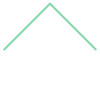

In [9]:
line

In [10]:
type(line)

shapely.geometry.linestring.LineString

In [26]:
print( list(line.coords) )
print( line.coords[2] )

[(0.0, 0.0), (1.0, 1.0), (2.0, 0.0)]
(2.0, 0.0)


<div class="alert alert-block alert-warning">

## 1. Shapely geometries
What `shapely` geometry are each of the parcels in the Moscow parcels layer? What `shapely` geometry are their centroids?
    
Find the Kenworthy Theater within the parcels database (hint: the name field for its mailing address, 
    PM_MAIL_NM, is "KENWORTHY PERFORMING ARTS CTR").
What are the coordinates for the corners of its parcel?    
</div>


In [27]:
#geometry of the parcels
print(parcels.geom_type) #use the geom_type of attributes

0       MultiPolygon
1       MultiPolygon
2       MultiPolygon
3       MultiPolygon
4       MultiPolygon
            ...     
7389    MultiPolygon
7390    MultiPolygon
7391    MultiPolygon
7392    MultiPolygon
7393    MultiPolygon
Length: 7394, dtype: object


**The parcels are multi-point polygons**

In [28]:
#geometry of centriods 
print(parcels.centroid.geom_type)
#np.array(parcels.centroid)

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
7389    Point
7390    Point
7391    Point
7392    Point
7393    Point
Length: 7394, dtype: object


**The parcel centroids are a point object**

In [29]:
### Find the Kenworthy Theater within the parcels database 
#(hint: the name field for its mailing address, PM_MAIL_NM, is "KENWORTHY PERFORMING ARTS CTR"). 
#What are the coordinates for the corners of its parcel?

parcels.head() #take a look at the data
#first you need to isolate the Theater's row 
#parcels.loc[parcels['PM_MAIL_NM'] == "KENWORTHY PERFORMING ARTS CTR"].geometry
#geometry is the column in the table with this information, but how do I export this using shapely 


parcels.loc[parcels['PM_MAIL_NM'] == "KENWORTHY PERFORMING ARTS CTR"].bounds

# tried using polygon.exterior.coords but was not able to get it to work. 

,minx,miny,maxx,maxy
1359,2.310911e+06,1.848472e+06,2.311037e+06,1.848533e+06


<div class="alert alert-block alert-warning">

## 2. Identifying Moscow residents underserved by city parks.
You're an urban planner consulting with the City of Moscow.  The city is interested in increasing the number of parks
    within the city, and better designing those parks to meet the needs of those who are currently underserved
    by the city's existing parks.  The city wants to begin the planning process by reaching out to these currently
    underserved residents, but first the city needs to know who they are.
    
The city asks you to produce a list of all resident addresses within the city limits whose property is at least 1000 feet
    from a current park.
    
To properly address the letters and questionaires that the city will be sending out, the city would like this list
    of residents as a csv file, with each property address on a separate line (property addresses are represented within
    the parcels database by the field name "PM_PROP_AD").  Produce this file and a map of the underserved parcels.
    


</div>

<AxesSubplot:>

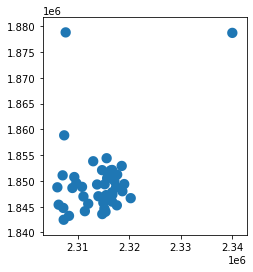

In [30]:
#first steps is to create a 1000 ft buffer on all parks

buffer_radius = 1000 # ft

buf_park = parks.buffer(buffer_radius) # Careful!  I'm not sure why this is, but geopandas requires a slice here, not a single index
    #If you use just one index, it seems to remove all the geopandas properties of the data
    
buf_park.plot() # yeah that looks right

In [33]:
# now need to extract a list of all residential addresses that are OUTSIDE this buffer zone

#we only want residental parcels 

zoning #the LANDUSEDESC lists the land use type 
print(zoning.LANDUSEDESC.unique())
res_land_types = ('Auto-Urban Residential', 'Auto-Urban Residential, Medium Density', 
                  'Urban Residential, Medium Density', 'Urban Residential', 'Suburban Residential')

#get the index values for all the residential types
residental_index = zoning.index[(zoning['LANDUSEDESC'] == 'Auto-Urban Residential') |
                                (zoning['LANDUSEDESC'] == 'Auto-Urban Residential, Medium Density') |
                                (zoning['LANDUSEDESC'] == 'Urban Residential, Medium Density') |
                                (zoning['LANDUSEDESC'] == 'Urban Residential') |
                                (zoning['LANDUSEDESC'] == 'Suburban Residential')] 
#extract the residental areas from zoning 
residental_areas = zoning.iloc[residental_index]
residental_areas

print(residental_areas.LANDUSEDESC.unique()) #to check that we were able to subset all the residential types
#sweet it worked

['Auto-Urban Residential' 'University' 'Parks, Recreation, and Open Space'
 'Auto-Urban Residential, Medium Density' 'Urban Commercial'
 'Urban Residential, Medium Density' 'Urban Residential'
 'Suburban Residential' 'Public and Semi-Public' 'Auto-Urban Commercial'
 'Vacant' 'Auto-Urban Industrial' 'Agricultural'
 'Research/Technology Park' '' 'Suburban Commercial']
['Auto-Urban Residential' 'Auto-Urban Residential, Medium Density'
 'Urban Residential, Medium Density' 'Urban Residential'
 'Suburban Residential']


<AxesSubplot:>

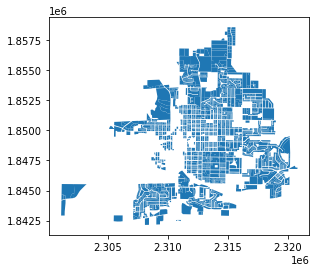

In [32]:
residental_areas.plot()

C:\Users\harr4718\AppData\Local\Temp/ipykernel_36356/1186087555.py:3: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  res_properties = gpd.overlay(parcels, residental_areas, how='intersection')


<AxesSubplot:>

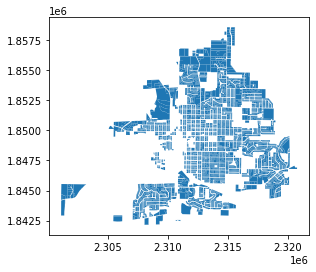

In [34]:
## extract all the properties that are zoned residental 

res_properties = gpd.overlay(parcels, residental_areas, how='intersection')
res_properties.plot()

In [37]:
#when doing the overlays ran into an error where the previous buf_park layer was not compatible. 
#need to make it a geodataframe, not a geoseries

type(buf_park) #geopandas.geoseries.GeoSeries
type(res_properties) #geopandas.geodataframe.GeoDataFrame


buffered_parks = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buf_park))


In [36]:
#Create a new layer that is residential properties outside of park
underserved = gpd.overlay(res_properties, buffered_parks, how='difference')
underserved

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LASTEDITOR,SUBTYPECODE,SUBTYPEDESC,PARCELID,ADDRESS,LOCDESC,GlobalID_2,SHAPE_Length,SHAPE_Area,geometry
0,3725,RP39N05W203725,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,None,None,Single Family Residential,RPM00000190010,2016 Main St,,{A4FB52A4-E1CE-4235-9BEF-8EDF025F69D6},317.708891,6257.095467,"POLYGON Z ((2310761.577 1842473.271 0.000, 231..."
1,3040,RPM00000203040,TATKINMAH LLC,709 E F STREET,,MOSCOW,ID,83843.0,,20120925.0,...,None,None,Single Family Residential,RPM00000190010,2016 Main St,,{A4FB52A4-E1CE-4235-9BEF-8EDF025F69D6},317.708891,6257.095467,"POLYGON Z ((2310767.544 1842532.973 0.000, 231..."
2,0010,RPM00000190010,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,2016 S MAIN,20120925.0,...,None,None,Single Family Residential,RPM00000190010,2016 Main St,,{A4FB52A4-E1CE-4235-9BEF-8EDF025F69D6},317.708891,6257.095467,"POLYGON Z ((2310762.839 1842532.869 0.000, 231..."
23,0RRA,RPM03400010RRA,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,340 N MAIN,20190815.0,...,None,None,Single Family Residential,RPM03400010RRB,111 E D St,,{9EA5CB9E-4735-4CE5-AD7B-27B255587812},287.879565,4518.246690,"POLYGON Z ((2311056.308 1850903.063 0.000, 231..."
24,014A,RPM0340001014A,"RATHBUN, BARBRA E",329 N WASHINGTON ST,,MOSCOW,ID,83843.0,329 N WASHINGTON,20000127.0,...,None,None,Single Family Residential,RPM03400010RRB,111 E D St,,{9EA5CB9E-4735-4CE5-AD7B-27B255587812},287.879565,4518.246690,"POLYGON Z ((2311082.421 1850823.059 0.000, 231..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,0040,RPM08050030040,"LEARY, TERRY",PO BOX 8608,,MOSCOW,ID,83843.0,471 73 BOYDE,19700916.0,...,None,None,Single Family Residential,RPM08000030040,471 73 Boyde,,{DF91A9FB-B24C-4AA3-B08D-4E1780A7AF02},419.450359,10759.474204,"POLYGON Z ((2309540.763 1844885.432 0.000, 230..."
11263,0050,RPM08050030050,479/481 BOYDE LLC,1025 PRAIRIE LANE,,MOSCOW,ID,83843.0,479 81 BOYDE,19700916.0,...,None,None,Single Family Residential,RPM08000030040,471 73 Boyde,,{DF91A9FB-B24C-4AA3-B08D-4E1780A7AF02},419.450359,10759.474204,"POLYGON Z ((2309536.603 1844996.738 0.000, 230..."
11266,001A,,,,,,,0.0,,0.0,...,None,None,Single Family Residential,RPM0800003001A,457 Boyde Ave,,{6297135D-36F2-4577-B6BC-CB5F80D6F1F2},512.028793,13836.512135,"POLYGON Z ((2309806.368 1845006.717 0.000, 230..."
11267,001A,,,,,,,0.0,,0.0,...,None,None,Single Family Residential,RPM08000030030,463 Boyde Ave,,{2EE4B257-A617-4B3D-B25A-C846951F813C},419.459716,10759.919003,"POLYGON Z ((2309721.089 1844892.275 0.000, 230..."


In [38]:
#Export the list of addresses that are park underserved as a .csv
## property addresses are represented within the parcels database by the field name "PM_PROP_AD"). 

addresses = underserved['PM_PROP_AD']
addresses
addresses.to_csv('underserved_addresses.csv') 
#checked the file and this worked

In [60]:
#map of underserved properties 


%matplotlib widget

fig, ax = plt.subplots(figsize = (10, 10))

underserved.plot(ax=ax, color='darkgoldenrod', zorder = 3, label = 'underserved properties' )
#city_limits.plot(ax=ax, color = 'white', edgecolor='black')
#zoning.plot(ax=ax, color='black')  # would it be helpful to have a black background for all proparties
roads.plot(ax=ax, color='gray', label = 'road')
parks.plot(ax=ax, color = 'teal', label = 'park',
           marker = 'X', markersize = 100, 
          zorder=2) #capitol X is chunky x
ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )


ax.set_title('Residential properties in Moscow >1000 ft from a park')
ax.legend() #add legen for parks and roads layer

ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False) #remove tick marks and labels 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [55]:
#from Tim

i = 2 #Look at one park, for example
print(parks.iloc[i])

buffer_radius = 200 # What are the units for this?

buffered_park = parks.iloc[i:i+1].buffer(buffer_radius) # Careful!  I'm not sure why this is, but geopandas requires a slice here, not a single index
    #If you use just one index, it seems to remove all the geopandas properties of the data
buffered_park.plot()



FACILITYID                                               PR-E17-G
NAME                                                Ghormley Park
SUBTYPEFIELD                                                    0
FEATURECODE                                                      
FULLADDR                                              504 Home St
OPERDAYS                                                         
OPERHOURS                                                        
PARKAREA                                                     7.34
PARKURL         https://www.ci.moscow.id.us/parks-rec/parks/Pa...
NUMPARKING                                                    0.0
RESTROOM                                                      Yes
ADACOMPLY                                                        
CAMPING                                                        No
SWIMMING                                                       No
HIKING                                                         No
FISHING   

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [56]:
%matplotlib widget

fig, ax = plt.subplots()
parks.buffer(buffer_radius).plot(ax=ax, color='g')
# city_limits.plot(ax=ax, color=None, edgecolor='r')
roads.plot(ax=ax)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1837691.7277759165, 1858582.946164012)

In [28]:
roads

,CENTERLINEID,FROMLEFT,TOLEFT,FROMRIGHT,TORIGHT,FULLNAME,FEDROUTE,FEDRTETYPE,AFEDRTE,AFEDRTETYPE,...,SLOPE,OCI2017,OCI2014,GlobalID,FACILITYID,OCI2019,OCI2020,ADTID,SHAPE_Length,geometry
0,02600,0.0,0.0,0.0,0.0,MAIN ST,None,Other,None,None,...,NaN,58.92,71.66,{E10997BF-346F-493B-9078-ABF3BA07D894},STREET-02600,96.08,96.08,F19-05,87.664841,"MULTILINESTRING ((2310851.729 1847250.622, 231..."
1,01430,0.0,0.0,0.0,0.0,FIRST ST,None,Other,None,None,...,NaN,90.93,98.96,{F2D06156-E244-4542-A0A7-9F47285F09AF},STREET-01430,86.04,86.04,G16-05,349.983212,"MULTILINESTRING ((2310883.550 1849572.726, 231..."
2,02670,102.0,114.0,105.0,205.0,MAIN ST,None,Other,None,None,...,NaN,71.70,100.00,{BF94EEC2-9DBF-42FD-8BA0-31C170DEC8CB},STREET-02670,80.02,80.02,F17-12,230.721479,"MULTILINESTRING ((2310883.464 1849564.375, 231..."
3,02660,204.0,218.0,205.0,221.0,MAIN ST,None,Other,None,None,...,NaN,71.70,100.00,{E4ADA45C-08D8-4C70-B30F-46E1097647A3},STREET-02660,80.02,80.02,F17-06,239.999980,"MULTILINESTRING ((2310880.869 1849333.668, 231..."
4,02650,302.0,318.0,301.0,307.0,MAIN ST,None,Other,None,None,...,NaN,91.97,100.00,{D3CE1840-EC8C-4124-AAEF-4A67AB2B5415},STREET-02650,95.17,95.17,F17-07,240.667684,"MULTILINESTRING ((2310878.196 1849093.683, 231..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,00301,1600.0,1756.0,1601.0,1751.0,THIRD ST,None,Other,None,None,...,5.0,NaN,NaN,{CE44A217-E6DA-4168-A8A9-C28AD394A399},STREET-00301,NaN,NaN,None,756.596825,"MULTILINESTRING ((2316177.219 1849043.781, 231..."
2214,13760,NaN,NaN,NaN,NaN,SOUTHVIEW AVE,None,None,None,None,...,10.0,NaN,NaN,{588D3E9B-7CBE-48D5-94BF-0DB57D0E0442},STREET-13760,NaN,NaN,None,706.800143,"MULTILINESTRING ((2312049.540 1843770.847, 231..."
2215,13765,NaN,NaN,NaN,NaN,SUNNY CT,None,None,None,None,...,7.0,NaN,NaN,{2F896E18-E40F-4BD6-81D2-5DDD91482100},STREET-13765,NaN,NaN,None,173.316937,"MULTILINESTRING ((2312699.813 1843557.137, 231..."
2216,13770,NaN,NaN,NaN,NaN,SOUTHVIEW AVE,None,None,None,None,...,10.0,NaN,NaN,{4BAB6FC8-B24E-49A0-B852-9AF25FD43BF2},STREET-13770,NaN,NaN,None,221.456644,"MULTILINESTRING ((2312699.813 1843557.137, 231..."


In [29]:
zoning.columns

Index(['LANDUSECODE', 'LANDUSEDESC', 'BASEELEV', 'HEIGHT', 'LASTUPDATE',
       'LASTEDITOR', 'SUBTYPECODE', 'SUBTYPEDESC', 'PARCELID', 'ADDRESS',
       'LOCDESC', 'GlobalID', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [30]:
zoning['LANDUSEDESC'].unique()

array(['Auto-Urban Residential', 'University',
       'Parks, Recreation, and Open Space',
       'Auto-Urban Residential, Medium Density', 'Urban Commercial',
       'Urban Residential, Medium Density', 'Urban Residential',
       'Suburban Residential', 'Public and Semi-Public',
       'Auto-Urban Commercial', 'Vacant', 'Auto-Urban Industrial',
       'Agricultural', 'Research/Technology Park', '',
       'Suburban Commercial'], dtype=object)

In [31]:
zoning['LANDUSECODE'].unique()

array(['111', '750', '800', '109', '250', '115', '110', '120', '700',
       '200', '11', '400', '900', '999', '0', '150', None], dtype=object)

In [32]:
# We can measure the distance between any parcel and a point near the center of downtown Moscow
from shapely.geometry import Point
parcels['Dwntn_dist'] = parcels.distance(Point(2.311e6, 1.849e6))

#### Visualizing the data
I think each of the plots below is interesting.  Try commenting and uncommenting each one

In [64]:
%matplotlib widget
fig, ax = plt.subplots( figsize=(8,8) )

# These are a few of the interesting plots to look at.
#parcels.plot(column='Dwntn_dist', ax=ax, legend=True, vmax=5280);
zoning.plot(column='LANDUSEDESC', ax=ax, legend=True, cmap='tab20') 
#parcels.plot(column= 'SaleYear', ax=ax, legend=True, vmin=1990)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

roads.plot(ax=ax, color='gray')

#this thread has some good resources for taking the legend outside the plot box 
## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


<AxesSubplot:>

### Property sales over time
Similar to the assignment from last week, we can look at the property sales as a function of time.

In [66]:
import pandas as pd
print( parcels['PM_DEEDCDT'].astype(str)[:4] )

parcels['SaleDate'] = pd.to_datetime(
    parcels['PM_DEEDCDT'], 
    errors='coerce', 
    format='%Y%m%d')


0    20120925.0
1    20120925.0
2           0.0
3    20190815.0
Name: PM_DEEDCDT, dtype: object


In [67]:
parcels['SaleDate']

0      2012-09-25
1      2012-09-25
2             NaT
3      2019-08-15
4      2019-08-15
          ...    
7389          NaT
7390          NaT
7391          NaT
7392          NaT
7393          NaT
Name: SaleDate, Length: 7394, dtype: datetime64[ns]

In [68]:
dates = parcels['PM_DEEDCDT'].to_numpy() # Pull out all the sale dates (initially floats)
yr = np.full( dates.shape, np.nan ) # initialize a variable full of nans

for i in range(len(dates)): 
    if dates[i] > 0:
        yr[i] = int( str(dates[i])[:4] )
    else:
        yr[i] = np.nan

parcels['SaleYear'] = yr # Create a new column for the parcels data frame representing sale year


In [69]:
bin_size = np.timedelta64(365, 'D')/12 # days
fig, ax = plt.subplots()
ax.hist(parcels['SaleDate'], bins=np.arange(np.datetime64('1990-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            bin_size ) )
ylabel_text = 'Number of property sales in Moscow\nper ' + str(bin_size.astype(int)) + ' days'
ax.set_ylabel(ylabel_text)
ax.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') );
# ax.set_xlim(np.datetime64('2010-12-15'), np.datetime64('2011-01-01') )

# Note that the sales at the end of 2010 are anomalous, and are all recorded on the same day.
# That's suspicious and Tim thinks that it must be some change in accounting or record keeping.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<div class="alert alert-block alert-warning">

## 3. Investing in downtown property
You are the GIS consultant for a property investment company that specializes in
downtown and higher-density properties.  Your company is considering Moscow real estate.
You've heard about the boom in sales within the city, and your company would like to know how competitive
property purchasing will be, or if they will be able to drive a hard bargin.

Has the downtown property market heated up as much as within the city as a whole?
Compare sale rates within two of the zoned downtown regions with those of the city as a whole.
    
Is there anything else in these data that you would like to share with your colleagues
    that could help advise them as you consider this investment?
</div>

In [70]:
#first we need to figure out which zones are downtown + commercial 

%matplotlib widget
fig, ax = plt.subplots( figsize=(8,8) )
zoning[zoning['LANDUSEDESC'] == 'Urban Commercial'].plot(ax=ax, color='blue')
zoning[zoning['LANDUSEDESC'] == 'Auto-Urban Commercial'].plot(ax=ax, color='teal')

                                                        
ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

roads.plot(ax=ax, color='gray')

#looks like Urban Commerical and Auto-Urban Commercial are the downtown zones

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [71]:
#create a new set that is only the downtown zones

downtown_index = zoning.index[(zoning['LANDUSEDESC'] == 'Urban Commercial') | (zoning['LANDUSEDESC'] == 'Auto-Urban Commercial')]
downtown = zoning.iloc[downtown_index]
downtown.plot() #cool, that works

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [72]:
#get only the downtown parcels 

dntn_properties = gpd.overlay(parcels, downtown, how='intersection')
dntn_properties.plot()
dntn_properties

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

,LABEL,PM_PAR_14,PM_MAIL_NM,PM_MAIL_A1,PM_MAIL_A2,PM_MAIL_CT,PM_MAIL_ST,PM_MAIL_ZP,PM_PROP_AD,PM_DEEDCDT,...,LASTEDITOR,SUBTYPECODE,SUBTYPEDESC,PARCELID,ADDRESS,LOCDESC,GlobalID_2,SHAPE_Length,SHAPE_Area,geometry
0,3725,RP39N05W203725,TATKINMAH LLC,709 E F ST,,MOSCOW,ID,83843.0,,20120925.0,...,None,None,Light Industrial-Manufacturing-Warehouse,RPM0690002002A,255 Nelson Ave,,{BE73B475-AF8F-40B3-92C2-002B8B8DDA6A},620.591055,22703.998486,"POLYGON Z ((2311244.325 1842370.750 0.000, 231..."
1,001A,RPM0690001001A,"DE MEERLEER, JEFF",215 E PALOUSE RIVER DRIVE,,MOSCOW,ID,83843.0,215 E PALOUSE RIV,20060126.0,...,None,None,Light Industrial-Manufacturing-Warehouse,RPM0690002002A,255 Nelson Ave,,{BE73B475-AF8F-40B3-92C2-002B8B8DDA6A},620.591055,22703.998486,"POLYGON Z ((2311249.304 1842533.974 0.000, 231..."
2,002A,RPM0690002002A,FICCA 255 NELSON LLC,3422 FOOTHILL ROAD,,MOSCOW,ID,83843.0,255 NELSON,20040831.0,...,None,None,Light Industrial-Manufacturing-Warehouse,RPM0690002002A,255 Nelson Ave,,{BE73B475-AF8F-40B3-92C2-002B8B8DDA6A},620.591055,22703.998486,"POLYGON Z ((2311367.114 1842328.986 0.000, 231..."
3,0RRD,RPM03400010RRD,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,328 N MAIN,20190815.0,...,None,None,Vacant-Undeveloped,RPM03400010RRD,328 N Main St,,{0ECB5E33-C46B-4C26-B07E-4D5F8C453F46},235.117344,2292.802315,"POLYGON Z ((2311045.184 1850794.380 0.000, 231..."
4,0RRA,RPM03400010RRA,"PAR HAWAII, LLC",825 TOWN AND COUNTRY LN,STE 1500,HOUSTON,TX,77024.0,340 N MAIN,20190815.0,...,None,None,Vacant-Undeveloped,RPM03400010RRD,328 N Main St,,{0ECB5E33-C46B-4C26-B07E-4D5F8C453F46},235.117344,2292.802315,"POLYGON Z ((2311051.732 1850794.307 0.000, 231..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,001C,,,,,,,0.0,,0.0,...,None,None,,RPM0766001001B,,,{A28BD181-1F18-40C2-A690-E96BB59E7537},1262.753518,60977.131815,"POLYGON Z ((2311483.735 1853080.170 0.000, 231..."
583,002C,RPM9600000002C,MOSCOW MEDICAL PROPERTIES LLC,213 N MAIN ST,,MOSCOW,ID,83843.0,213 N MAIN,20120419.0,...,None,None,Public Parking,RPM9600000002B,,Commons,{23E6D2CC-AB50-43F9-A9BC-1B52530C590C},309.433028,5976.836492,"POLYGON Z ((2310843.227 1850412.183 0.000, 231..."
584,002B,RPM1030011002B,WASHINGTON TRUST BANK,PO BOX 2127,,SPOKANE,WA,99201.0,222 TROY RD,20190419.0,...,None,None,Single Family Residential,RPM1030011002A,225 Spotswood St,,{88A8C875-1F48-4DE6-A378-F13E3A02FB5C},250.400020,3830.400675,"POLYGON Z ((2311503.542 1846686.604 0.000, 231..."
585,002B,RPM1030011002B,WASHINGTON TRUST BANK,PO BOX 2127,,SPOKANE,WA,99201.0,222 TROY RD,20190419.0,...,None,None,Multi-Family Residential,RPM1030011001D,222 Troy Rd,,{EAB1C5A9-3DDB-4411-BAB4-A552E488ECCB},437.133038,9699.358155,"POLYGON Z ((2311503.469 1846681.014 0.000, 231..."


In [79]:
##add downtown sales over everything sales

bin_size = np.timedelta64(365, 'D')/12 # days
fig, ax = plt.subplots(figsize=(10,4))

#baseline sales
parcels['SaleDate'].plot(kind = 'hist',
                         bins=np.arange(np.datetime64('1990-01-01'), 
                                        np.datetime64('2022-01-01'), 
                                        bin_size ),
                         color = 'darkslategrey')                       
#downtown sales
ax.hist(dntn_properties['SaleDate'], bins=np.arange(np.datetime64('1990-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            bin_size ),
       color = 'turquoise')

ylabel_text = 'Number of property sales in Moscow\nper ' + str(bin_size.astype(int)) + ' days'
ax.set_ylabel(ylabel_text)
ax.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') )

# remove 2010?? it is just too weird 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(10957.0, 18993.0)

In [80]:
#what about sales per year instead of sales per month?
bin_size = np.timedelta64(365, 'D') # days
fig, ax = plt.subplots(figsize=(10,4))

#baseline sales
parcels['SaleDate'].plot(kind = 'hist',
                         bins=np.arange(np.datetime64('1990-01-01'), 
                                        np.datetime64('2022-01-01'), 
                                        bin_size ),
                         color = 'darkslategrey')                       
#downtown sales
ax.hist(dntn_properties['SaleDate'], bins=np.arange(np.datetime64('1990-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            bin_size ),
       color = 'turquoise')

ylabel_text = 'Number of property sales in Moscow\nper ' + str(bin_size.astype(int)) + ' days'
ax.set_ylabel(ylabel_text)
ax.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') )

# a little bit better to look at 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(10957.0, 18993.0)

In [138]:
## what if we scaled up the downtown sales using a second axis? 
bin_size = np.timedelta64(365, 'D') # days
fig, ax1 = plt.subplots(figsize=(10,4))

#baseline sales
parcels['SaleDate'].plot(kind = 'hist',
                         bins=np.arange(np.datetime64('1990-01-01'), 
                                        np.datetime64('2022-01-01'), 
                                        bin_size ),
                         color = 'darkgoldenrod', alpha = .75,
                        ax=ax1,
                        label = "All properties")
ax1.set_ylabel('All types of property sales', color =  'darkgoldenrod')
ax1.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') )
ax1.set_title('Number of property sales in Moscow per year')
ax1.set_xlabel('Year')


#downtown sales
ax2 = ax1.twinx() 
dntn_properties['SaleDate'].plot(kind = 'hist',
                                 bins=np.arange(np.datetime64('1990-01-01'), 
                                                np.datetime64('2022-01-01'), 
                                                bin_size ),
                                 color = 'lightseagreen', alpha = .75,
                                ax = ax2,
                                label = "Just downtown properties")
ax2.set_ylabel('Commerical downtown property sales', color =  'lightseagreen')
ax2.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') )



# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
#from this = https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

**This plot would be interpretted as :**
   - goldenrod is when overall sale rate is higher than downtown sales
   - blue is when downtown sale rate is higher than overall sales
   - teal is overlap in downtown and overall sale rate

**Some other information that could be helpful to employers:**    
  - which parcels frequently change hands   
  - which parcels are located close to other features (i.e. downtown area for more foot traffic)
  - sale rate relative to parcel size (maybe they are only interested in super small properties and those sell more frequently)
  - price! But that is not included in this data set
    

<div class="alert alert-block alert-warning">

## 4. Find, plot, work with data of your own
Find a spatial, vector dataset of your choosing (by googling, from another class, 
    or from a research project of yours). This could be climate data, geologic units,
    census data, ecological units, demographic data, etc. Download or copy this dataset
    into the current directory, plot it, and use geopandas to draw on the attributes 
    of that data (even just lengths, areas, etc) and tell me something about that data.
</div>

### I am interested in displaying the locations for my research plots located at Rinkler Rock Creek Ranch near Hailey, ID. 

I will bring in the ranch border (**ranch**) and the border for my study areas (**studyarea**) which contains some herbicide treated area and some nearby untreated areas.
I located my study plots within the study area using stratifed random sampling by vegetation cover. I created a shapefile (point) layer that has one point for each possible plot location (since plots are 30 x 30 m), and the perennial grass and shrub cover. Plant functional group cover was downloaded from the Rangeland analysis platform (https://rangelands.app/), which produces plant cover data for US rangelands every year using remote sensing + lots of monitoring. 

From these points, I selected potential plot locations based on slope and aspect, with the goal of getting equal representation of those components within and outside of treated aras since I will be comparing the two. I knew that there would likely be some complications in the field putting all these plots in, so I created more plots than was needed so I could have some options in the field (**wiggleroom**)

This summer I ended up actually sampling 30 plots. I would like to select those which were acutally sampled from my wiggle room dataset, and then label them with their plot names so I can match them to ecological attributes I measured. I am bringing in a list of actual plots selected and their plot names (**sampled**)


Goal: generate **summer2021**, which will be a shapefile (points) of only plots which were actually selected for sampling this summer. 

In [201]:
#read in and desribe the files 
studyarea = gpd.read_file('../MyData/Harrison_study_boundary_2021/Harrison study boundary 2021/Harrison_studyboundaries.shp') # study area polygons with herbicide and control areas
# TIM: Use studyboundaries_GRH.shp

wiggleroom = gpd.read_file('../MyData/wiggleroom_plots/FuelLoad_Points.shp')
# TIM: Use wiggleroom_points.GRH.shp

# a file which has the OG (from wiggle room) plot name, and then the new plot name. Only includes plots which were actually sampled in 2021 field season

In [234]:
#lets make it more clear where is treated by herbicide and were in the untreated control study area
trt_list = ['trt', 'trt', 'trt', 
            'untrt','untrt','untrt','untrt','untrt','untrt','untrt']
studyarea['treatment'] = trt_list
studyarea

,ID,TYPE,CORNERS,AREA_NAME,AR_SIZE_AC,SPR_ACRES,SPR_VOL,Shape_Leng,Shape_Area,geometry,treatment
0,1,SPRAY_AREA,10,Field1,34.700,48.6,97.2,0.021747,1.562786e-05,"POLYGON ((-114.41291 43.42134, -114.41519 43.4...",trt
1,1,SPRAY_AREA,13,Field2,4.910,48.6,97.2,0.011144,2.206693e-06,"POLYGON ((-114.40819 43.41854, -114.40819 43.4...",trt
2,2,SPRAY_AREA,5,Field3,7.720,48.6,97.2,0.009050,3.469739e-06,"POLYGON ((-114.35719 43.37190, -114.35388 43.3...",trt
3,3,None,0,HG_untrt3,1.140,0.0,0.0,0.003222,5.113208e-07,"POLYGON ((-114.40306 43.41901, -114.40296 43.4...",untrt
4,3,None,0,HG_untrt2,0.511,0.0,0.0,0.001962,2.296950e-07,"POLYGON ((-114.40824 43.41885, -114.40821 43.4...",untrt
5,3,None,0,HG-untrt1,1.030,0.0,0.0,0.004790,4.630942e-07,"POLYGON ((-114.40537 43.41896, -114.40520 43.4...",untrt
6,3,None,0,KC_untrt2,6.720,0.0,0.0,0.009045,3.023252e-06,"POLYGON ((-114.40522 43.42126, -114.40243 43.4...",untrt
7,4,None,0,Lrc_untrt1,13.100,0.0,0.0,0.010230,5.876898e-06,"POLYGON ((-114.35719 43.37194, -114.35719 43.3...",untrt
8,4,None,0,Lrc_untrt2,3.810,0.0,0.0,0.006384,1.711141e-06,"POLYGON ((-114.35673 43.37094, -114.35402 43.3...",untrt
9,3,None,0,KC_untrt1,29.300,0.0,0.0,0.017715,1.317680e-05,"POLYGON ((-114.41171 43.42268, -114.41171 43.4...",untrt


In [242]:
#plot the treatment areas 
fig, ax = plt.subplots(figsize=(10,10))
studyarea.plot(ax=ax, column = studyarea['treatment'], legend = True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [244]:
#check out the ranch and study area
fig, ax = plt.subplots(figsize=(10,10))
studyarea.plot(ax=ax, column = studyarea['treatment'], legend = True)
wiggleroom.plot(ax=ax, color = 'yellowgreen', markersize = 15)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [245]:
#for the purposes of vizualization, lets just look at my main study area. 
fig, ax = plt.subplots(figsize=(10,10))
studyarea.plot(ax=ax, column = studyarea['treatment'], legend = True, edgecolor = 'black')
wiggleroom.plot(ax=ax, color = 'yellowgreen', markersize = 15) 
ax.set_xlim(-114.4175, -114.4)
ax.set_ylim(43.417, 43.426 )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(43.417, 43.426)

In [179]:
##bring in info about which plots were actually sampled this summer and what their new plot names are

data = [['101T', 'HSHG_LRC_T'], ['102T', 'HSHG_T_7'], ['103T', 'HSHG_T_6'], ['104T', 'HSHG_T_2'], ['105T', 'HSHG_C_1'], ['101C', 'HSHG_LRC_C'],
        ['102C', 'HSHG_C_8'], ['103C', 'HSHG_C_5'], ['104C', 'HSHG_C_6'], ['105C', 'HSHG_T_1'], ['201T', 'HSLG_T_5'], ['202T', 'HSLS_T_6'], ['203T', 'HSLG_T_1'],
        ['204T', 'HSLG_T_3'], ['201C', 'HSLG_C_4'], ['202C', 'HSLG_C_3'], 
        ['203C', 'HSLG_C_1'], ['204C', 'HSLG_C_2'], ['301T', 'LSHG_LRC_T'], ['302T', 'LSHG_T_7'], 
        ['303T', 'LSHG_T_3'], ['304T', 'LSHG_T_2'], ['305T', 'LSHG_T_1'], ['301C', 'LSHG_LRC_C'], ['302C', 'LSHG_C_5'], ['303C', 'LSHG_C_4'],
        ['304C', 'LSHG_C_3'], ['401T', 'LSLG_T_2'], ['401T', 'LSLG_T_5'], ['401C', 'LSLG_C_1'], ['402C', 'LSLG_C_5']]

sampled = pd.DataFrame(data, columns = ['new_name', 'old_name'])
sampled


,new_name,old_name
0,101T,HSHG_LRC_T
1,102T,HSHG_T_7
2,103T,HSHG_T_6
3,104T,HSHG_T_2
4,105T,HSHG_C_1
5,101C,HSHG_LRC_C
6,102C,HSHG_C_8
7,103C,HSHG_C_5
8,104C,HSHG_C_6
9,105C,HSHG_T_1


In [177]:
wiggleroom
#okay so the Name column is the old plot name

,Name,Shrub,PG,BGround,Notes,geometry
0,HSLG_T_1,40,28,3,None,POINT Z (-114.40705 43.41868 0.00000)
1,HSLG_C_1,33,25,4,None,POINT Z (-114.40840 43.41868 0.00000)
2,HSHG_C_1,33,32,5,None,POINT Z (-114.40356 43.41868 0.00000)
3,HSHG_T_1,37,36,5,None,POINT Z (-114.40274 43.41867 0.00000)
4,HSLG_C_2,36,29,6,None,POINT Z (-114.40624 43.42218 0.00000)
5,HSLG_T_2,35,30,7,None,POINT Z (-114.40652 43.42110 0.00000)
6,HSLG_T_3,36,28,8,None,POINT Z (-114.40625 43.42003 0.00000)
7,HSLG_T_4,38,25,10,None,POINT Z (-114.40624 43.41976 0.00000)
8,HSLG_C_3,37,22,8,None,POINT Z (-114.40517 43.42029 0.00000)
9,HSLG_C_4,26,25,12,None,POINT Z (-114.40463 43.42057 0.00000)


In [198]:
#Figure out which of the old name plots in wiggle room were actually sampled this summer 

good_idx = wiggleroom['Name'].isin(sampled['old_name'])
summer2021 = wiggleroom.loc[good_idx]
summer2021

,Name,Shrub,PG,BGround,Notes,geometry
0,HSLG_T_1,40,28,3,None,POINT Z (-114.40705 43.41868 0.00000)
1,HSLG_C_1,33,25,4,None,POINT Z (-114.40840 43.41868 0.00000)
2,HSHG_C_1,33,32,5,None,POINT Z (-114.40356 43.41868 0.00000)
3,HSHG_T_1,37,36,5,None,POINT Z (-114.40274 43.41867 0.00000)
4,HSLG_C_2,36,29,6,None,POINT Z (-114.40624 43.42218 0.00000)
6,HSLG_T_3,36,28,8,None,POINT Z (-114.40625 43.42003 0.00000)
8,HSLG_C_3,37,22,8,None,POINT Z (-114.40517 43.42029 0.00000)
9,HSLG_C_4,26,25,12,None,POINT Z (-114.40463 43.42057 0.00000)
10,HSLG_T_5,42,19,2,None,POINT Z (-114.41002 43.42164 0.00000)
11,HSLS_T_6,47,27,3,None,POINT Z (-114.40948 43.42138 0.00000)


In [246]:
## now we need to select from the wiggle room points only those which were actually sampled this summer 
good_idx = pd.DataFrame(index=sampled.index)
for names in old_name_sampled:
    good_idx[names] = wiggleroom.index[wiggleroom['Name'] == names]


ValueError: Length of values (1) does not match length of index (31)

In [247]:
#check to see if it worked 

fig, ax = plt.subplots(figsize=(10,10))
studyarea.plot(ax=ax, color = 'grey')
wiggleroom.plot(ax=ax, color = 'red', marker = 'x', markersize = 15)
summer2021.plot(ax=ax, color = 'cyan', markersize = 15)

#yep it did - you can see there are some red X's from the wiggle room data that was not included in the summer2021 actually sampled subset 


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [214]:
#bring in new plot names 


# I am going to sort them by a common column and then join 

summer2021
summer2021 = summer2021.sort_values(by = 'Name')
summer2021


names = sampled.sort_values(by = 'old_name')
names


,new_name,old_name
4,105T,HSHG_C_1
7,103C,HSHG_C_5
8,104C,HSHG_C_6
6,102C,HSHG_C_8
5,101C,HSHG_LRC_C
0,101T,HSHG_LRC_T
9,105C,HSHG_T_1
3,104T,HSHG_T_2
2,103T,HSHG_T_6
1,102T,HSHG_T_7


In [217]:
summer2021['New_plot_names'] = sampled['new_name']

In [218]:
##label the points by the plot name 
summer2021['New_plot_names'] = sampled['new_name']
summer2021

#why is this not working?? I want to bring in the new names. Do I need to do some fancy indexing and matching?

,Name,Shrub,PG,BGround,Notes,geometry,New_plot_names
2,HSHG_C_1,33,32,5,None,POINT Z (-114.40356 43.41868 0.00000),103T
34,HSHG_C_5,33,31,7,None,POINT Z (-114.40410 43.42083 0.00000),NaN
35,HSHG_C_6,32,32,7,None,POINT Z (-114.40355 43.42083 0.00000),NaN
37,HSHG_C_8,40,31,4,None,POINT Z (-114.40732 43.42218 0.00000),NaN
52,HSHG_LRC_C,30,36,4,None,POINT Z (-114.35477 43.37286 0.00000),NaN
53,HSHG_LRC_T,30,34,7,None,POINT Z (-114.35504 43.37178 0.00000),NaN
3,HSHG_T_1,37,36,5,None,POINT Z (-114.40274 43.41867 0.00000),104T
25,HSHG_T_2,34,32,6,None,POINT Z (-114.40732 43.42110 0.00000),303C
29,HSHG_T_6,34,33,5,None,POINT Z (-114.40948 43.42110 0.00000),401C
30,HSHG_T_7,33,32,2,None,POINT Z (-114.41002 43.42110 0.00000),402C


In [252]:
#create a plot with NEW plot labels 

fig, ax = plt.subplots(figsize=(10,10))
studyarea.plot(ax=ax, column = studyarea['treatment'], legend = True, edgecolor = 'black')
#wiggleroom.plot(ax=ax, color = 'red', marker = 'x', markersize = 15)
summer2021.plot(ax=ax, color = 'yellowgreen', markersize = 25)
ax.set_xlim(-114.4175, -114.4)
ax.set_ylim(43.417, 43.426 )


for x, y, label in zip(summer2021.geometry.x, summer2021.geometry.y, summer2021.New_plot_names):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …